In [26]:
import intake
import xarray as xr
import numpy as np
import os
import regionmask
states = regionmask.defined_regions.natural_earth_v5_0_0.us_states_50
import pandas as pd
import matplotlib.pyplot as plt

import cmip6_tools as ct

# for notebooks in other locations, load it like this:
# sys.path.append('/home/willkrantz/LIBRARIES/')
# print(sys.path)
# from cmip6_tools import cmip6_tools as ct

In [2]:
%load_ext autoreload
%autoreload 2

* Pangeo conda environment
https://github.com/pangeo-data/pangeo-docker-images/blob/master/pangeo-notebook/environment.yml
    * Installing conda environment for jupyter: https://towardsdatascience.com/get-your-conda-environment-to-show-in-jupyter-notebooks-the-easy-way-17010b76e874

* 


# Finding models and members

In [7]:
ct.get_models()

array(['CMCC-CM2-HR4', 'EC-Earth3P-HR', 'HadGEM3-GC31-MM',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LM', 'EC-Earth3P', 'ECMWF-IFS-HR',
       'ECMWF-IFS-LR', 'HadGEM3-GC31-LL', 'CMCC-CM2-VHR4', 'GFDL-CM4',
       'GFDL-AM4', 'IPSL-CM6A-LR', 'E3SM-1-0', 'CNRM-CM6-1', 'GFDL-ESM4',
       'GFDL-ESM2M', 'GFDL-CM4C192', 'GFDL-OM4p5B', 'GISS-E2-1-G',
       'GISS-E2-1-H', 'CNRM-ESM2-1', 'BCC-CSM2-MR', 'BCC-ESM1', 'MIROC6',
       'AWI-CM-1-1-MR', 'EC-Earth3-LR', 'IPSL-CM6A-ATM-HR', 'CESM2',
       'CESM2-WACCM', 'CNRM-CM6-1-HR', 'MRI-ESM2-0', 'SAM0-UNICON',
       'GISS-E2-1-G-CC', 'UKESM1-0-LL', 'EC-Earth3', 'EC-Earth3-Veg',
       'FGOALS-f3-L', 'CanESM5', 'CanESM5-CanOE', 'INM-CM4-8',
       'INM-CM5-0', 'NESM3', 'MPI-ESM-1-2-HAM', 'CAMS-CSM1-0',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'MRI-AGCM3-2-H', 'MRI-AGCM3-2-S',
       'MCM-UA-1-0', 'INM-CM5-H', 'KACE-1-0-G', 'NorESM2-LM',
       'FGOALS-f3-H', 'FGOALS-g3', 'MIROC-ES2L', 'FIO-ESM-2-0', 'NorCPM1',
       'NorESM1-F', 'MPI-ESM1-2-XR'

In [17]:
# by default, it uses the pangeo cmip6 cloud collection
ct.get_members('ACCESS-CM2', 'historical', 'tas', 'mon')

array(['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1'],
      dtype=object)

In [18]:
# loading from esgf is slower and more error prone, but can have more data
ct.get_members('ACCESS-CM2', 'historical', 'tas', 'mon',source='esgf')

array(['r10i1p1f1', 'r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1',
       'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1'],
      dtype=object)

In [15]:
ct.get_members('ACCESS-CM2', 'historical', 'tas', 'mon',source='esgf')

array(['r10i1p1f1', 'r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1',
       'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1'],
      dtype=object)

# Loading Data

In [23]:
ds_esgf = ct.get_cmip6(model='ACCESS-CM2', member='r5i1p1f1', experiment='historical', var='tas', freq='mon', source='esgf')
ds_pangeo = ct.get_cmip6(model='ACCESS-CM2', member='r5i1p1f1', experiment='historical', var='tas', freq='mon')

loaded http://esgf-data04.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r5i1p1f1/Amon/tas/gn/v20210607/tas_Amon_ACCESS-CM2_historical_r5i1p1f1_gn_185001-201412.nc


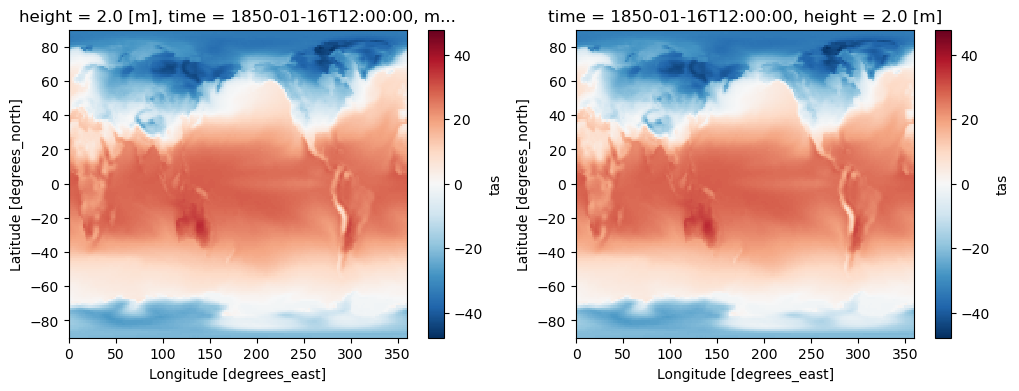

In [27]:
# plot the first time step of df_pangeo and df_esgf in a two panel subplot
fig,ax = plt.subplots(1,2,figsize=(12,4))
ds_pangeo.tas.isel(time=0).plot(ax=ax[0])
ds_esgf.tas.isel(time=0).plot(ax=ax[1])


# Subsetting by time and space

In [34]:
#subset by time and space
ds_hist = ct.get_cmip6(model='EC-Earth3', member='r1i1p1f1', experiment='historical', var='tas', freq='mon',
                        start_date='1970', end_date='2000', area='california')

ds_fut = ct.get_cmip6(model='EC-Earth3', member='r1i1p1f1', experiment='ssp370', var='tas', freq='mon',
                        start_date='2070', end_date='2100', area='california')

change = ds_fut.tas.mean(dim='time') - ds_hist.tas.mean(dim='time')


/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry


Text(0.5, 0.98, 'EC-Earth3, r1i1p1f1, tas, California, 1970-2000 vs 2070-2100')

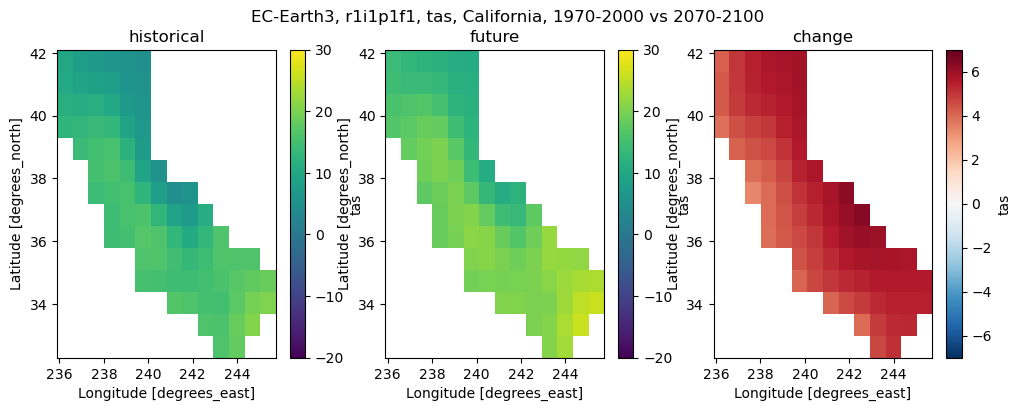

In [41]:
#Three panel plot with historical, future, and change
fig,ax = plt.subplots(1,3,figsize=(12,4))
ds_hist.tas.mean(dim='time').plot(ax=ax[0],vmin=-20, vmax=30)
ds_fut.tas.mean(dim='time').plot(ax=ax[1], vmin=-20, vmax=30)
change.plot(ax=ax[2], cmap = 'RdBu_r', vmin=-7, vmax=7)

#add titles
ax[0].set_title('historical')
ax[1].set_title('future')
ax[2].set_title('change')
#add super title for figure
fig.suptitle('EC-Earth3, r1i1p1f1, tas, California, 1970-2000 vs 2070-2100')



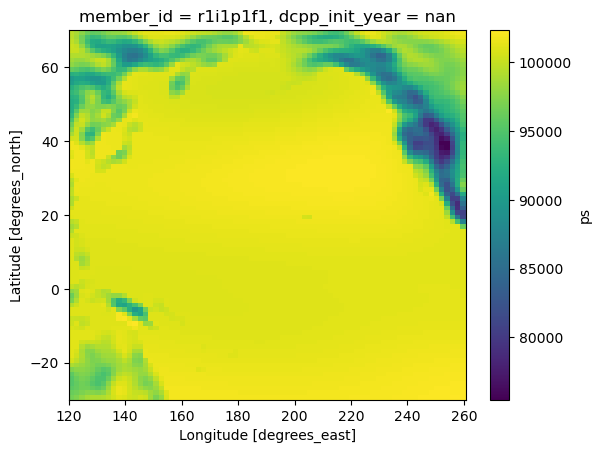

In [68]:
# subset by a lat lon box

ds = ct.get_cmip6(model='ACCESS-CM2', member='r1i1p1f1', experiment='historical', var='ps', freq='mon',
                       area = [-30,70,120,260])

ds_fut.ps.mean(dim='time').plot()

# Ocean variables

In [50]:
ds_hist = ct.get_cmip6(model='ACCESS-CM2', member='r1i1p1f1', experiment='historical', var='tos', freq='mon',)
ds_fut = ct.get_cmip6(model='ACCESS-CM2', member='r1i1p1f1', experiment='ssp370', var='tos', freq='mon',
                      area = [-30,30,120,300])
change = ds_fut.tos.mean(dim='time') - ds_hist.tos.mean(dim='time')

Text(0.5, 0.98, 'ACCESS-CM2, r1i1p1f1, tos, 1970-2000 vs 2070-2100')

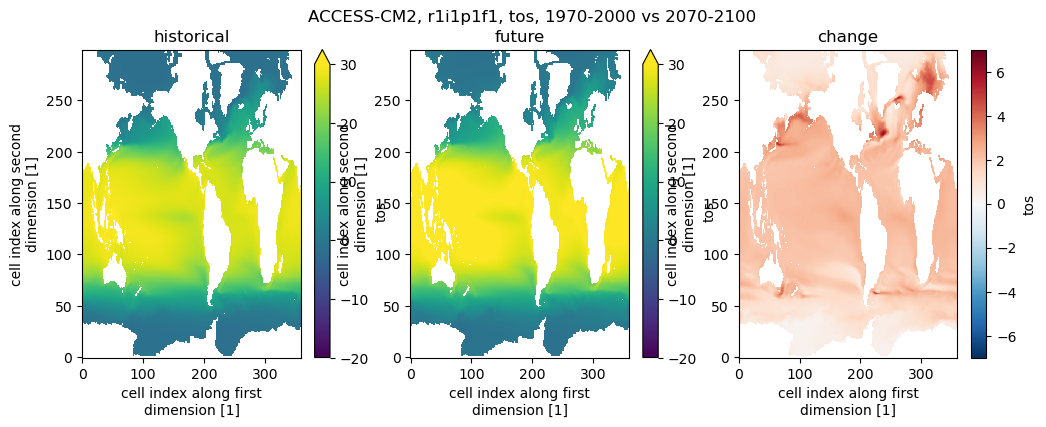

In [51]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
ds_hist.tos.mean(dim='time').plot(ax=ax[0],vmin=-20, vmax=30)
ds_fut.tos.mean(dim='time').plot(ax=ax[1], vmin=-20, vmax=30)
change.plot(ax=ax[2], cmap = 'RdBu_r', vmin=-7, vmax=7)

#add titles
ax[0].set_title('historical')
ax[1].set_title('future')
ax[2].set_title('change')
#add super title for figure
fig.suptitle('ACCESS-CM2, r1i1p1f1, tos, 1970-2000 vs 2070-2100')

In [69]:
# this currently doesn't work
ds_pacific = ct.get_cmip6(model='ACCESS-CM2', member='r1i1p1f1', experiment='historical', var='tos', freq='mon',
                    area = [-30,30,120,300])

KeyError: "no index found for coordinate 'lat'"

# Timeseries

In [83]:
ds_hist = ct.get_cmip6(model='EC-Earth3', member='r1i1p1f1', experiment='historical', var='pr', freq='mon',
                         area='california', timeseries = True)

ds_fut = ct.get_cmip6(model='EC-Earth3', member='r1i1p1f1', experiment='ssp370', var='pr', freq='mon',
                         area='california', timeseries=True)

/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry


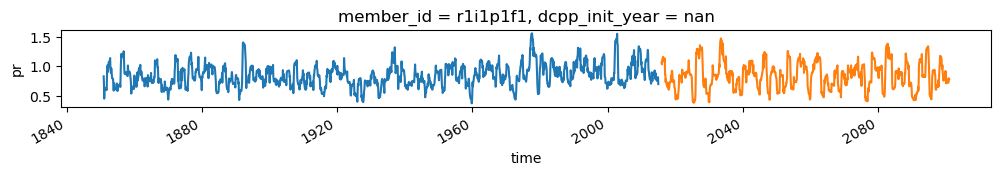

In [84]:
plt.figure(figsize=(12,1))
ds_hist.pr.rolling(time=12).mean().plot()
ds_fut.pr.rolling(time=12).mean().plot()

In [78]:
# the same command as above but loading from esgf is much slower, takes about 10 minutes to run
ds_hist = ct.get_cmip6(model='EC-Earth3', member='r1i1p1f1', experiment='historical', var='pr', freq='mon',
                         area='california', timeseries = True, source='esgf')

ds_fut = ct.get_cmip6(model='EC-Earth3', member='r1i1p1f1', experiment='ssp370', var='pr', freq='mon',
                         area='california', timeseries=True, source='esgf')

loaded http://esgf-data04.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Amon/pr/gr/v20200310/pr_Amon_EC-Earth3_historical_r1i1p1f1_gr_185001-185012.nc


/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry


loaded http://esgf-data04.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp370/r1i1p1f1/Amon/pr/gr/v20200310/pr_Amon_EC-Earth3_ssp370_r1i1p1f1_gr_201501-201512.nc


/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry


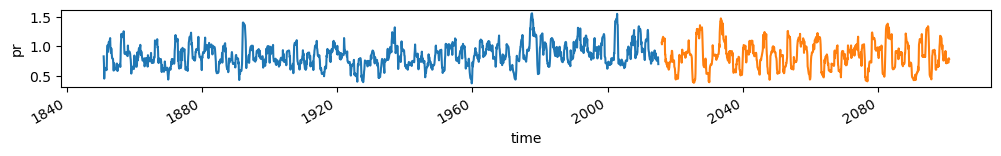

In [79]:
# takes a further 5 minutes to run
plt.figure(figsize=(12,1))
ds_hist.pr.rolling(time=12).mean().plot()
ds_fut.pr.rolling(time=12).mean().plot()

# Change in pr and t demo

In [80]:
downscaled_gcm_names = ['CESM2','MPI-ESM1-2-LR','CNRM-CM6-1',
    'EC-Earth3-Veg','FGOALS-g3','UKESM1-0-LL',
    'CanESM5','ACCESS-CM2','EC-Earth3',
    'MIROC6','NorESM2-MM','MPI-ESM1-2-HR',
    'TaiESM1','GISS-E2-1-G']

downscaled_variants = ['r11i1p1f1','r7i1p1f1','r1i1p1f2',
        'r1i1p1f1','r1i1p1f1','r2i1p1f2',
        'r1i1p2f1','r5i1p1f1','r1i1p1f1',
        'r1i1p1f1','r1i1p1f1','r7i1p1f1',
        'r1i1p1f1','r1i1p1f2',]

In [127]:

rewrite=False

hist_start_date = '1970'
hist_end_date = '2000'
fut_start_date = '2070'
fut_end_date = '2100'
freq = 'mon'
cmip6_db = []
area = 'california'
scenario = 'ssp370'

outfile = '~/cmip6_changes_df.pkl'

# open the file of previously calculated changes, if it exists
# check if the file exists
try:
    cmip6_change_df = pd.read_pickle(outfile)
except:
    cmip6_change_df = pd.DataFrame({'model':[], 'member':[], 'scenario':[], 'area':[], 'pr':[], 'tas':[]}
    )


#iterate through the models in the downscaled list
for model, member in zip(downscaled_gcm_names, downscaled_variants):

            # check if this model and member are already in the dataframe
            if len(cmip6_change_df[(cmip6_change_df.model==model) & (cmip6_change_df.member==member)])==0 or rewrite==True:
                print(f'*****getting {model}, {member}')

                try:
                    row = {'model':model, 'member':member, 'scenario':scenario, 'area':area}
                    for var in ['pr','tas']:
                        

                        var_ts_hist = ct.get_cmip6(model, 'historical', member, var, freq = freq, area=area, 
                                        start_date=hist_start_date, end_date=hist_end_date,
                                        timeseries=True,
                                        )
                        var_ts_fut = ct.get_cmip6(model, scenario, member, var, freq = freq, area=area, 
                                        start_date=fut_start_date, end_date=fut_end_date,
                                        timeseries=True,
                                        )
                        
                        var_val_hist = float(var_ts_hist.mean(dim='time')[var].values)
                        var_val_fut = float(var_ts_fut.mean(dim='time')[var].values)
                        var_val = var_val_fut - var_val_hist
                        row[f'{var}'] = var_val

                    cmip6_db.append(row)
                    cmip6_df = pd.DataFrame(cmip6_db)
                    cmip6_df.to_pickle(outfile)

                except Exception as e:
                    print(f'error with {model}, {member}')
                    print(e)
                    continue

            else:
                print(f'{model}, {member} already in dataframe, loading*****')
                row = cmip6_change_df[(cmip6_change_df.model==model) & (cmip6_change_df.member==member)].to_dict('records')[0]
                cmip6_db.append(row)
                cmip6_df = pd.DataFrame(cmip6_db)

                cmip6_df.to_pickle(outfile)
                continue

cmip6_df = pd.DataFrame(cmip6_db)
cmip6_df.to_pickle(outfile)                    

*****getting CESM2, r11i1p1f1
*****getting MPI-ESM1-2-LR, r7i1p1f1


/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/minic

*****getting CNRM-CM6-1, r1i1p1f2


/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/minic

*****getting EC-Earth3-Veg, r1i1p1f1


/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/minic

*****getting FGOALS-g3, r1i1p1f1


/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/minic

*****getting UKESM1-0-LL, r2i1p1f2
*****getting CanESM5, r1i1p2f1


/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/minic

*****getting ACCESS-CM2, r5i1p1f1
*****getting EC-Earth3, r1i1p1f1


/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/minic

*****getting MIROC6, r1i1p1f1


/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/minic

*****getting NorESM2-MM, r1i1p1f1
*****getting MPI-ESM1-2-HR, r7i1p1f1


/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/miniconda3/envs/pangeo_esgf/lib/python3.10/site-packages/pygeos/io.py:523: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry
/home/willkrantz/minic

*****getting TaiESM1, r1i1p1f1
*****getting GISS-E2-1-G, r1i1p1f2
error with GISS-E2-1-G, r1i1p1f2
list index out of range


/home/willkrantz/LIBRARIES/cmip6_tools/cmip6_tools.py:61: UserWarning: There are no datasets to load! Returning an empty dictionary.
  dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True}, cdf_kwargs={'chunks': {}}, progressbar=False);


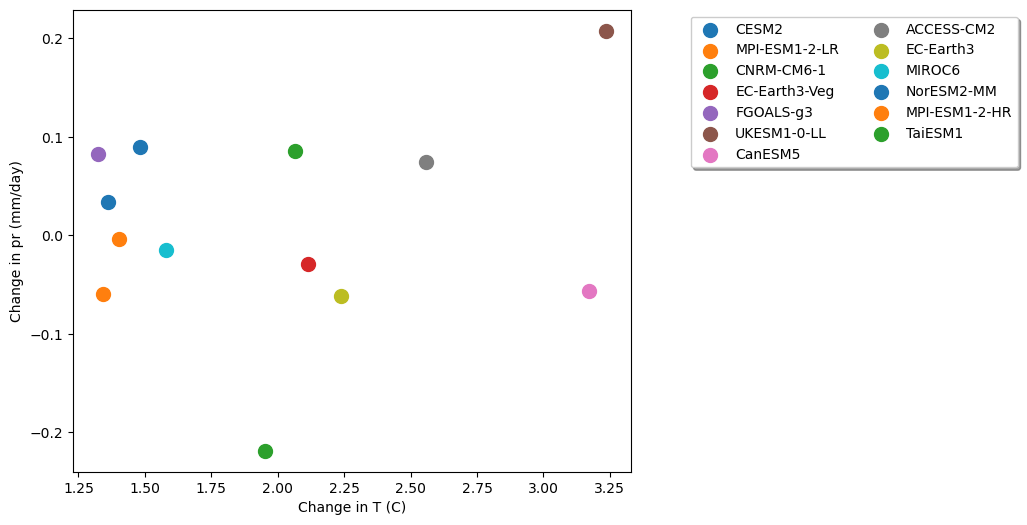

In [135]:
#load cmip6_df from pickle and make a scatter plot
cmip6_change_df = pd.read_pickle(outfile)

plt.figure(figsize=(12,6))
# scatterplot of pr and tas with labels from the model column using matplotlib
ax = plt.gca()
for i, row in cmip6_change_df.iterrows():
    ax.scatter(row.tas, row.pr, label=row.model, s=100)


plt.xlabel('Change in T (C)')
plt.ylabel('Change in pr (mm/day)')
# ax.set_xlim((2.2,6.7))
# ax.set_ylim((-0.6,0.5))
plt.legend()

ax = plt.gca()
# move the legend outside the plot
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.4, 1), shadow=True, ncol=2)#plt.ylim((2e-5,4e-5))


